In [2]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import mysql.connector

In [40]:
conn = mysql.connector.connect(
    host="localhost",
    user="newuser",
    password="prabha@015",
    database="world"
)

In [42]:
cursor=conn.cursor()

In [44]:
cursor.execute("select * from country")

In [46]:
row = cursor.fetchall()

In [48]:
print(row)

[('ABW', 'Aruba', 'North America', 'Caribbean', Decimal('193.00'), None, 103000, Decimal('78.4'), Decimal('828.00'), Decimal('793.00'), 'Aruba', 'Nonmetropolitan Territory of The Netherlands', 'Beatrix', 129, 'AW'), ('AFG', 'Afghanistan', 'Asia', 'Southern and Central Asia', Decimal('652090.00'), 1919, 22720000, Decimal('45.9'), Decimal('5976.00'), None, 'Afganistan/Afqanestan', 'Islamic Emirate', 'Mohammad Omar', 1, 'AF'), ('AGO', 'Angola', 'Africa', 'Central Africa', Decimal('1246700.00'), 1975, 12878000, Decimal('38.3'), Decimal('6648.00'), Decimal('7984.00'), 'Angola', 'Republic', 'José Eduardo dos Santos', 56, 'AO'), ('AIA', 'Anguilla', 'North America', 'Caribbean', Decimal('96.00'), None, 8000, Decimal('76.1'), Decimal('63.20'), None, 'Anguilla', 'Dependent Territory of the UK', 'Elisabeth II', 62, 'AI'), ('ALB', 'Albania', 'Europe', 'Southern Europe', Decimal('28748.00'), 1912, 3401200, Decimal('71.6'), Decimal('3205.00'), Decimal('2500.00'), 'Shqipëria', 'Republic', 'Rexhep Mej

In [50]:
column =[ i[0] for i in cursor.description]

In [52]:
print(column)

['Code', 'Name', 'Continent', 'Region', 'SurfaceArea', 'IndepYear', 'Population', 'LifeExpectancy', 'GNP', 'GNPOld', 'LocalName', 'GovernmentForm', 'HeadOfState', 'Capital', 'Code2']


In [65]:
data=pd.DataFrame(row,columns=column)

In [67]:
print(data)

    Code          Name      Continent                     Region SurfaceArea  \
0    ABW         Aruba  North America                  Caribbean      193.00   
1    AFG   Afghanistan           Asia  Southern and Central Asia   652090.00   
2    AGO        Angola         Africa             Central Africa  1246700.00   
3    AIA      Anguilla  North America                  Caribbean       96.00   
4    ALB       Albania         Europe            Southern Europe    28748.00   
..   ...           ...            ...                        ...         ...   
234  YEM         Yemen           Asia                Middle East   527968.00   
235  YUG    Yugoslavia         Europe            Southern Europe   102173.00   
236  ZAF  South Africa         Africa            Southern Africa  1221037.00   
237  ZMB        Zambia         Africa             Eastern Africa   752618.00   
238  ZWE      Zimbabwe         Africa             Eastern Africa   390757.00   

     IndepYear  Population LifeExpectan

In [73]:
data.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [80]:
data.tail()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
234,YEM,Yemen,Asia,Middle East,527968.00,1918.0,18112000,59.8,6041.00,5729.00,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.00,1918.0,10640000,72.4,17000.00,None,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.00,1910.0,40377000,51.1,116729.00,129092.00,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.00,1964.0,9169000,37.2,3377.00,3922.00,Zambia,Republic,Frederick Chiluba,3162.0,ZM
238,ZWE,Zimbabwe,Africa,Eastern Africa,390757.00,1980.0,11669000,37.8,5951.00,8670.00,Zimbabwe,Republic,Robert G. Mugabe,4068.0,ZW


In [82]:
data.dtypes

Code               object
Name               object
Continent          object
Region             object
SurfaceArea        object
IndepYear         float64
Population          int64
LifeExpectancy     object
GNP                object
GNPOld             object
LocalName          object
GovernmentForm     object
HeadOfState        object
Capital           float64
Code2              object
dtype: object

In [86]:
data.describe(include='all')

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
count,239,239,239,239,239,192.000000,2.390000e+02,222,239,178,239,239,238,232.000000,239
unique,239,239,7,25,238,NaN,NaN,160,214,178,239,35,179,NaN,239
top,ABW,Aruba,Africa,Caribbean,430.00,NaN,NaN,71.4,0.00,793.00,Aruba,Republic,Elisabeth II,NaN,AW
freq,1,1,58,24,2,NaN,NaN,4,24,1,1,123,35,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,1847.260417,2.543410e+07,NaN,NaN,NaN,NaN,NaN,NaN,2071.306034,NaN
std,NaN,NaN,NaN,NaN,NaN,420.831370,1.093398e+08,NaN,NaN,NaN,NaN,NaN,NaN,1184.095609,NaN
min,NaN,NaN,NaN,NaN,NaN,-1523.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1906.750000,2.380000e+05,NaN,NaN,NaN,NaN,NaN,NaN,915.750000,NaN
50%,NaN,NaN,NaN,NaN,NaN,1960.000000,3.869000e+06,NaN,NaN,NaN,NaN,NaN,NaN,2449.500000,NaN
75%,NaN,NaN,NaN,NaN,NaN,1974.000000,1.493550e+07,NaN,NaN,NaN,NaN,NaN,NaN,3065.250000,NaN


In [90]:
data.columns

Index(['Code', 'Name', 'Continent', 'Region', 'SurfaceArea', 'IndepYear',
       'Population', 'LifeExpectancy', 'GNP', 'GNPOld', 'LocalName',
       'GovernmentForm', 'HeadOfState', 'Capital', 'Code2'],
      dtype='object')

In [92]:
data.isna().sum()

Code               0
Name               0
Continent          0
Region             0
SurfaceArea        0
IndepYear         47
Population         0
LifeExpectancy    17
GNP                0
GNPOld            61
LocalName          0
GovernmentForm     0
HeadOfState        1
Capital            7
Code2              0
dtype: int64

In [96]:
data.dropna(inplace=True)

In [100]:
data.isna().sum()

Code              0
Name              0
Continent         0
Region            0
SurfaceArea       0
IndepYear         0
Population        0
LifeExpectancy    0
GNP               0
GNPOld            0
LocalName         0
GovernmentForm    0
HeadOfState       0
Capital           0
Code2             0
dtype: int64

In [136]:
import seaborn as sns

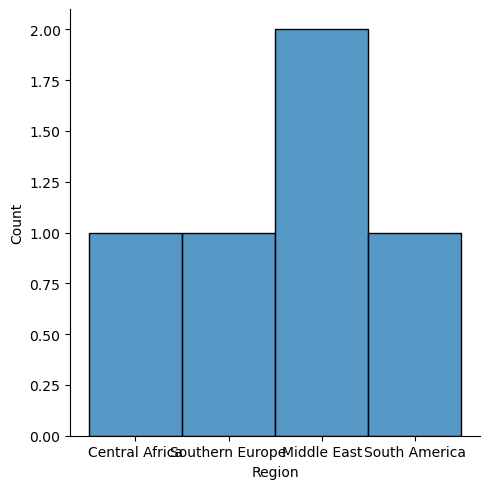

In [138]:
sns.displot(x=data.Region.head(5))

<Axes: xlabel='IndepYear', ylabel='Capital'>

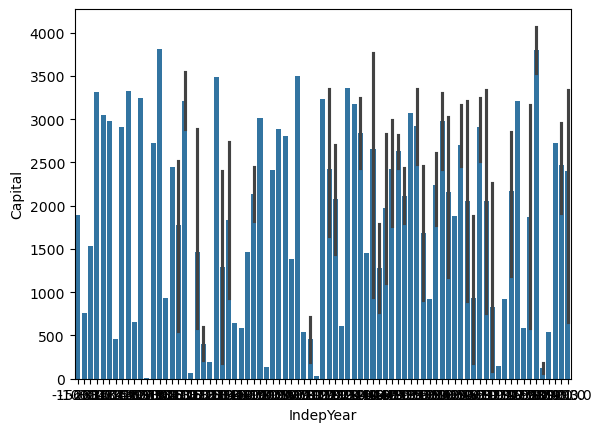

In [139]:
sns.barplot(x="IndepYear",y="Capital",data=data)

<Axes: xlabel='Population', ylabel='Density'>

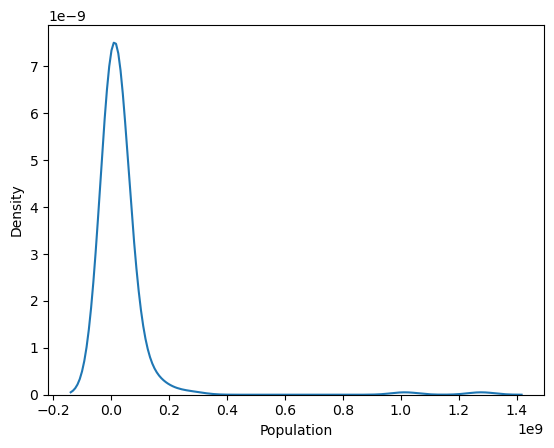

In [145]:
sns.kdeplot(x="Population",data=data)

<Axes: >

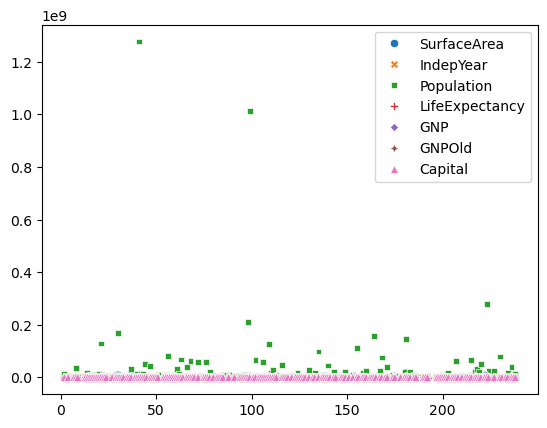

In [149]:
sns.scatterplot(data)

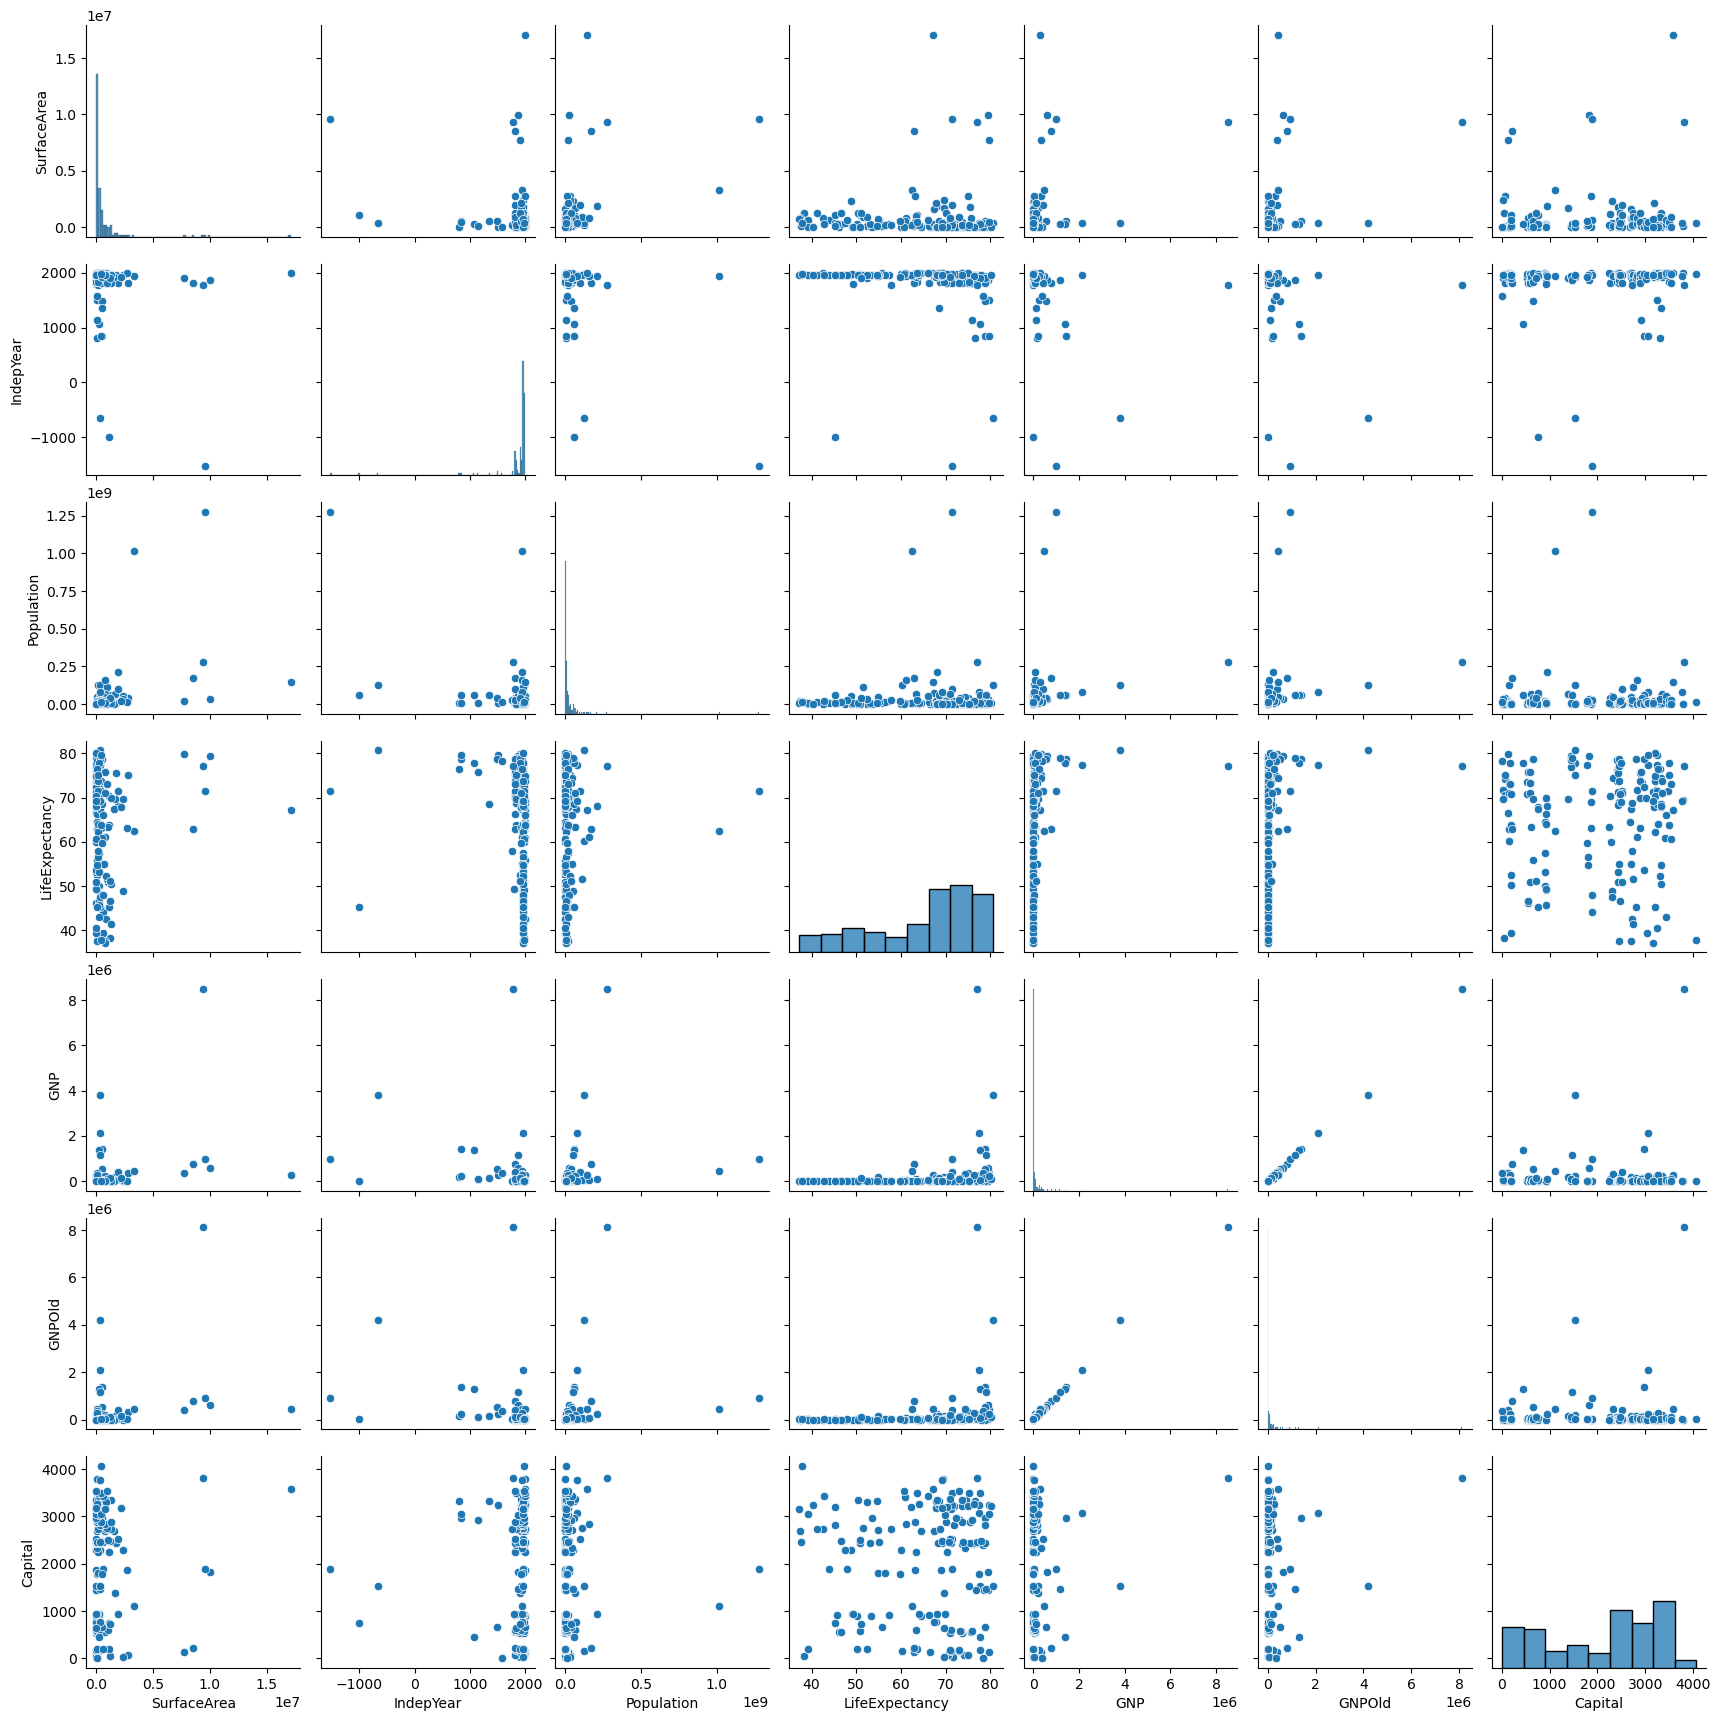

In [151]:
sns.pairplot(data)